In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [2]:
folder_path_parasitized = r'C:\Users\MANU\Downloads\cell_images\Parasitized'
folder_path_uninfected= r'C:\Users\MANU\Downloads\cell_images\Uninfected'

In [3]:
# Function to read and preprocess image
def read_and_preprocess_images(folder_path, label):
    data = []
    labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.png') or file_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, file_name)
            image = Image.open(image_path)
            image = image.resize((64, 64))  # Resize to a standard size
            image = np.array(image) / 255.0  # Normalize pixel values
            data.append(image)
            labels.append(label)
    return np.array(data), np.array(labels)








In [4]:
#load and process images from both folders
X_parasitized, y_parasitized = read_and_preprocess_images(folder_path_parasitized, 1)
X_uninfected, y_uninfected = read_and_preprocess_images(folder_path_uninfected, 0)

In [5]:
# Concatenate data and labels
X = np.concatenate([X_parasitized, X_uninfected])
y = np.concatenate([y_parasitized, y_uninfected])

In [6]:
#Split Data Into Training and Testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of training images:", len(X_train))
print("Number of testing images:", len(X_test))
print("Number of training images:", len(y_train))
print("Number of testing images:", len(y_test))


Number of training images: 22046
Number of testing images: 5512
Number of training images: 22046
Number of testing images: 5512


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Create a Sequential model
model = Sequential()

# Add the input layer using Input(shape)
model.add(Input(shape=(64, 64, 3)))

# Add the first Conv2D layer without specifying input_shape
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [8]:
#Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))




Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 104s 102ms/step - accuracy: 0.6948 - loss: 0.5525 - val_accuracy: 0.9332 - val_loss: 0.1891
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 62s 90ms/step - accuracy: 0.9276 - loss: 0.1909 - val_accuracy: 0.9341 - val_loss: 0.1872
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 64s 93ms/step - accuracy: 0.9465 - loss: 0.1596 - val_accuracy: 0.9526 - val_loss: 0.1483
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 65s 95ms/step - accuracy: 0.9563 - loss: 0.1302 - val_accuracy: 0.9494 - val_loss: 0.1491
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.9620 - loss: 0.1078 - val_accuracy: 0.9432 - val_loss: 0.1618
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 95ms/step - accuracy: 0.9682 - loss: 0.0898 - val_accuracy: 0.9510 - val_loss: 0.1655
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.9750 - loss: 0.0715 - val_accuracy: 0.9478 - val_loss: 0.1748
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 65s 95ms/step - accuracy: 0.9807 - loss: 0.0577 

In [11]:
#Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test loss:", test_loss)



173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9449 - loss: 0.2143
Test Accuracy: 0.9428519606590271
Test loss: 0.21075329184532166


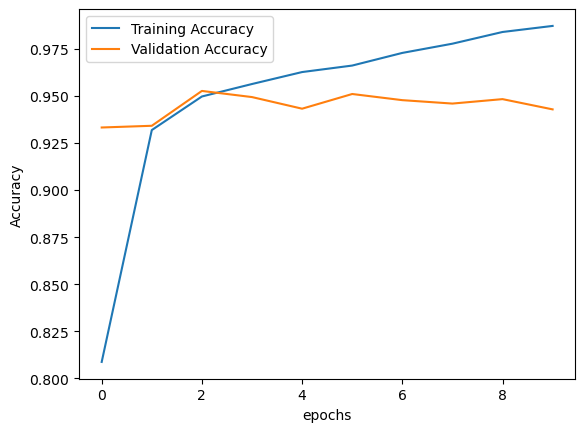

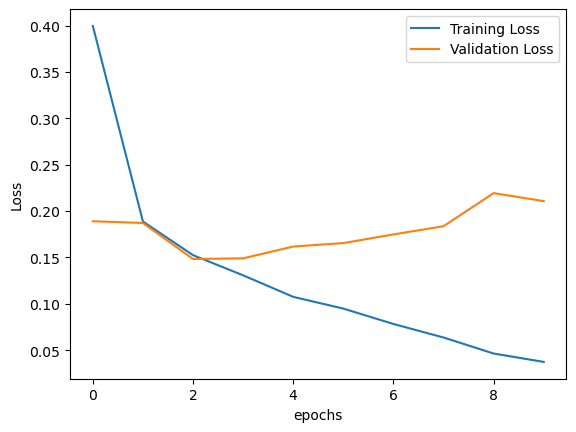

In [12]:
#Visualize Training model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
